In [ ]:
# !pip install -c pip -forge xgboost=1.3.3
# !pip install -c pip -forge lightgbm=3.1.1 
# !pip install -c pip -forge missingno=0.4.2

### 1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÌïòÍ∏∞

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

### 2.Îç∞Ïù¥ÌÑ∞ÏÇ¥Ìé¥Î≥¥Í∏∞

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Github/Kaggle/kaggle_kakr_housing/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Github/Kaggle/kaggle_kakr_housing/data/test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print("train.csv. Shape: ",df_train.shape)
print("test.csv. Shape: ",df_test.shape)

train.csv. Shape:  (15035, 21)
test.csv. Shape:  (6468, 20)


1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µÏàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

### 3.Îç∞Ïù¥ÌÑ∞Î∂àÎü¨Ïò§Í∏∞

In [ ]:
df_train.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0   0  20141013T000000  221900.0  ... -122.257           1340        5650
1   1  20150225T000000  180000.0  ... -122.233           2720        8062
2   2  20150218T000000  510000.0  ... -122.045           1800        7503
3   3  20140627T000000  257500.0  ... -122.327           2238        6819
4   4  20150115T000000  291850.0  ... -122.315           1650        9711

[5 rows x 21 columns]

In [ ]:
df_train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

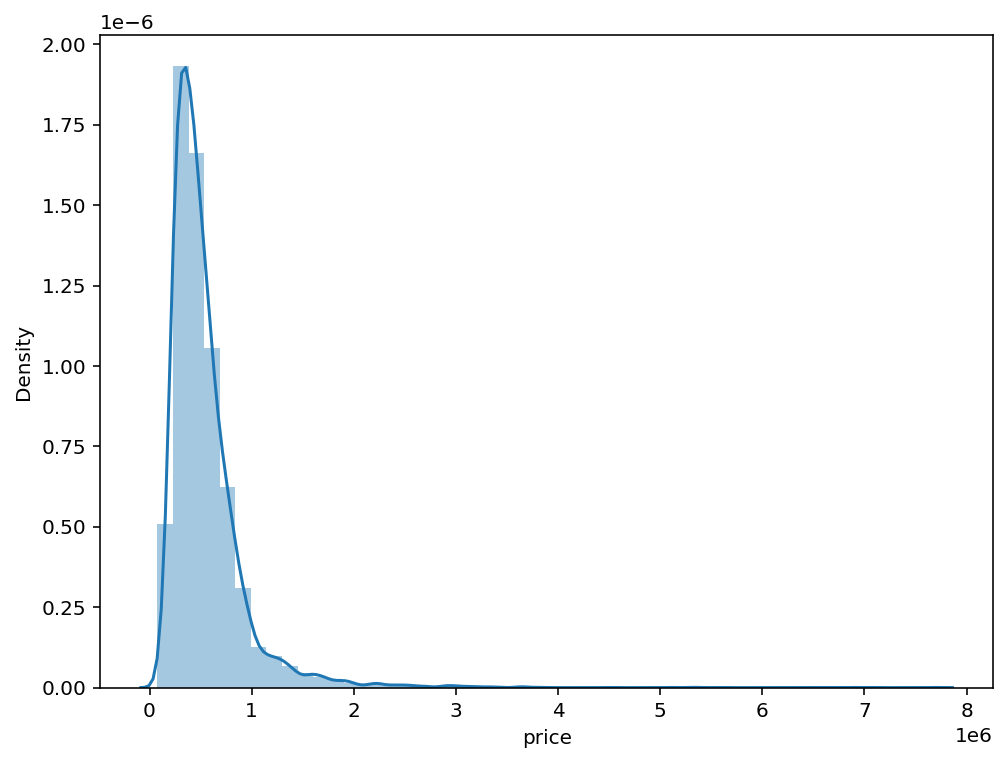

In [ ]:
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 4.290252
Kurtosis: 40.154919


Kurtosis Í∞íÏù¥ 3Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÎç∞, Í∞íÏù¥ 40Ïù∏ Í≤ÉÏúºÎ°ú Î¥êÏÑú Ï†ïÍ∑úÌôîÍ∞Ä ÌïÑÏöîÌïú Í≤ÉÏúºÎ°ú ÌåêÎã®

-> log Î•º Ï∑®ÌïòÏó¨ Ï†ïÍ∑úÌôîÌïòÏûê!

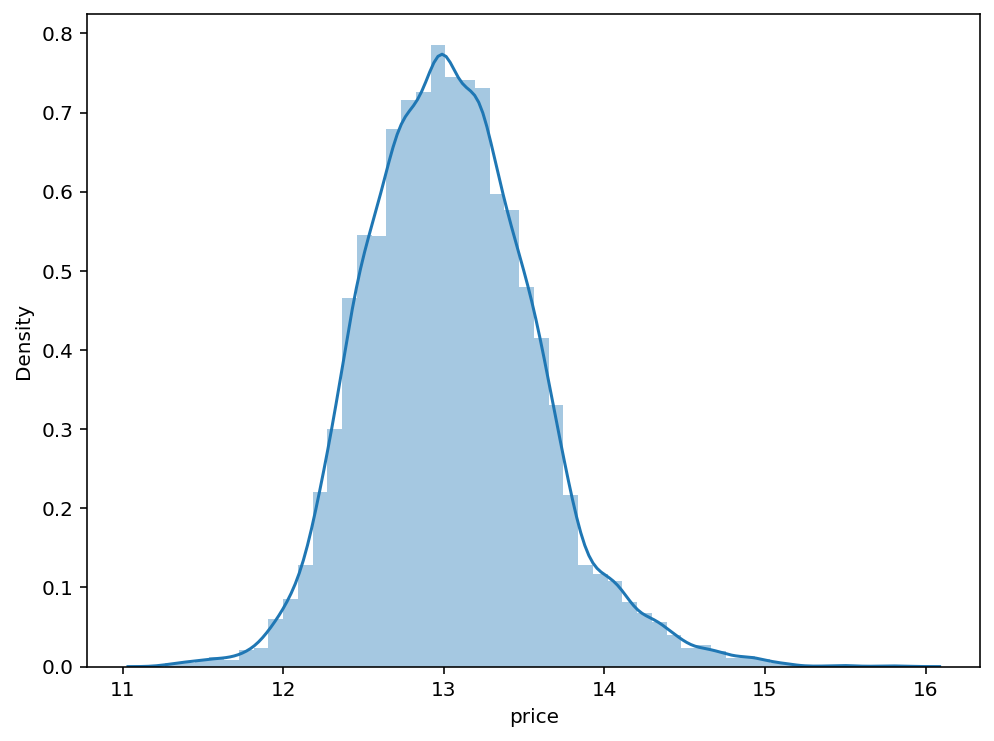

In [ ]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


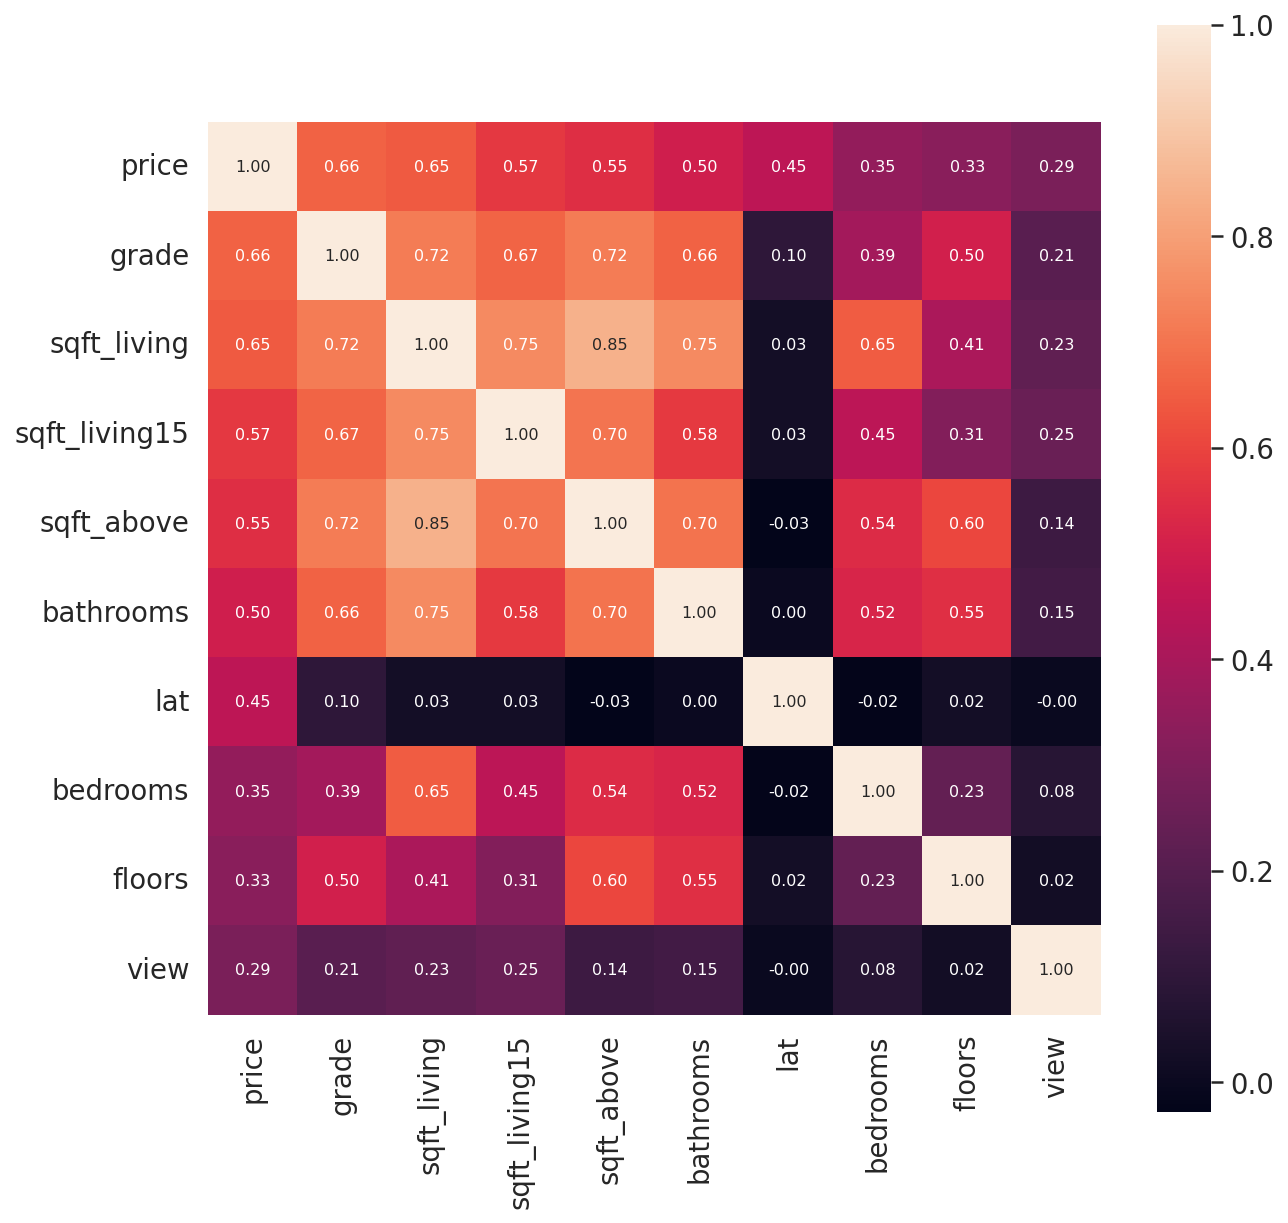

In [ ]:
#ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # priceÍ≥º correlationÏù¥ ÎÜíÏùÄ column 10Í∞ú ÎΩëÍ∏∞(ÎÇ¥Î¶ºÏ∞®Ïàú)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [ ]:
df_train.corr()

id     price  ...  sqft_living15  sqft_lot15
id             1.000000  0.035940  ...       0.029248   -0.032269
price          0.035940  1.000000  ...       0.621800    0.096976
bedrooms       0.010520  0.359946  ...       0.407394    0.027242
bathrooms      0.104030  0.552000  ...       0.573541    0.088120
sqft_living    0.041725  0.697907  ...       0.760271    0.184176
sqft_lot      -0.034077  0.108946  ...       0.147562    0.728458
floors         0.182848  0.317810  ...       0.287125   -0.010287
waterfront    -0.011775  0.172580  ...       0.091810    0.028255
view          -0.024360  0.347506  ...       0.278267    0.076501
condition     -0.101618  0.042947  ...      -0.091407   -0.003873
grade          0.078622  0.707412  ...       0.715321    0.119734
sqft_above     0.073086  0.607197  ...       0.737795    0.194226
sqft_basement -0.050634  0.314378  ...       0.198380    0.018813
yr_built       0.202477  0.076293  ...       0.324221    0.076009
yr_renovated  -0.029810  0.127533  ...       0.007995   -0.000348
zipcode       -0.005761 -0.039195  ...      -0.274176   -0.145710
lat            0.002588  0.444417  ...       0.048924   -0.081725
long           0.014757  0.054362  ...       0.333673    0.256201
sqft_living15  0.029248  0.621800  ...       1.000000    0.183599
sqft_lot15    -0.032269  0.096976  ...       0.183599    1.000000

[20 rows x 20 columns]

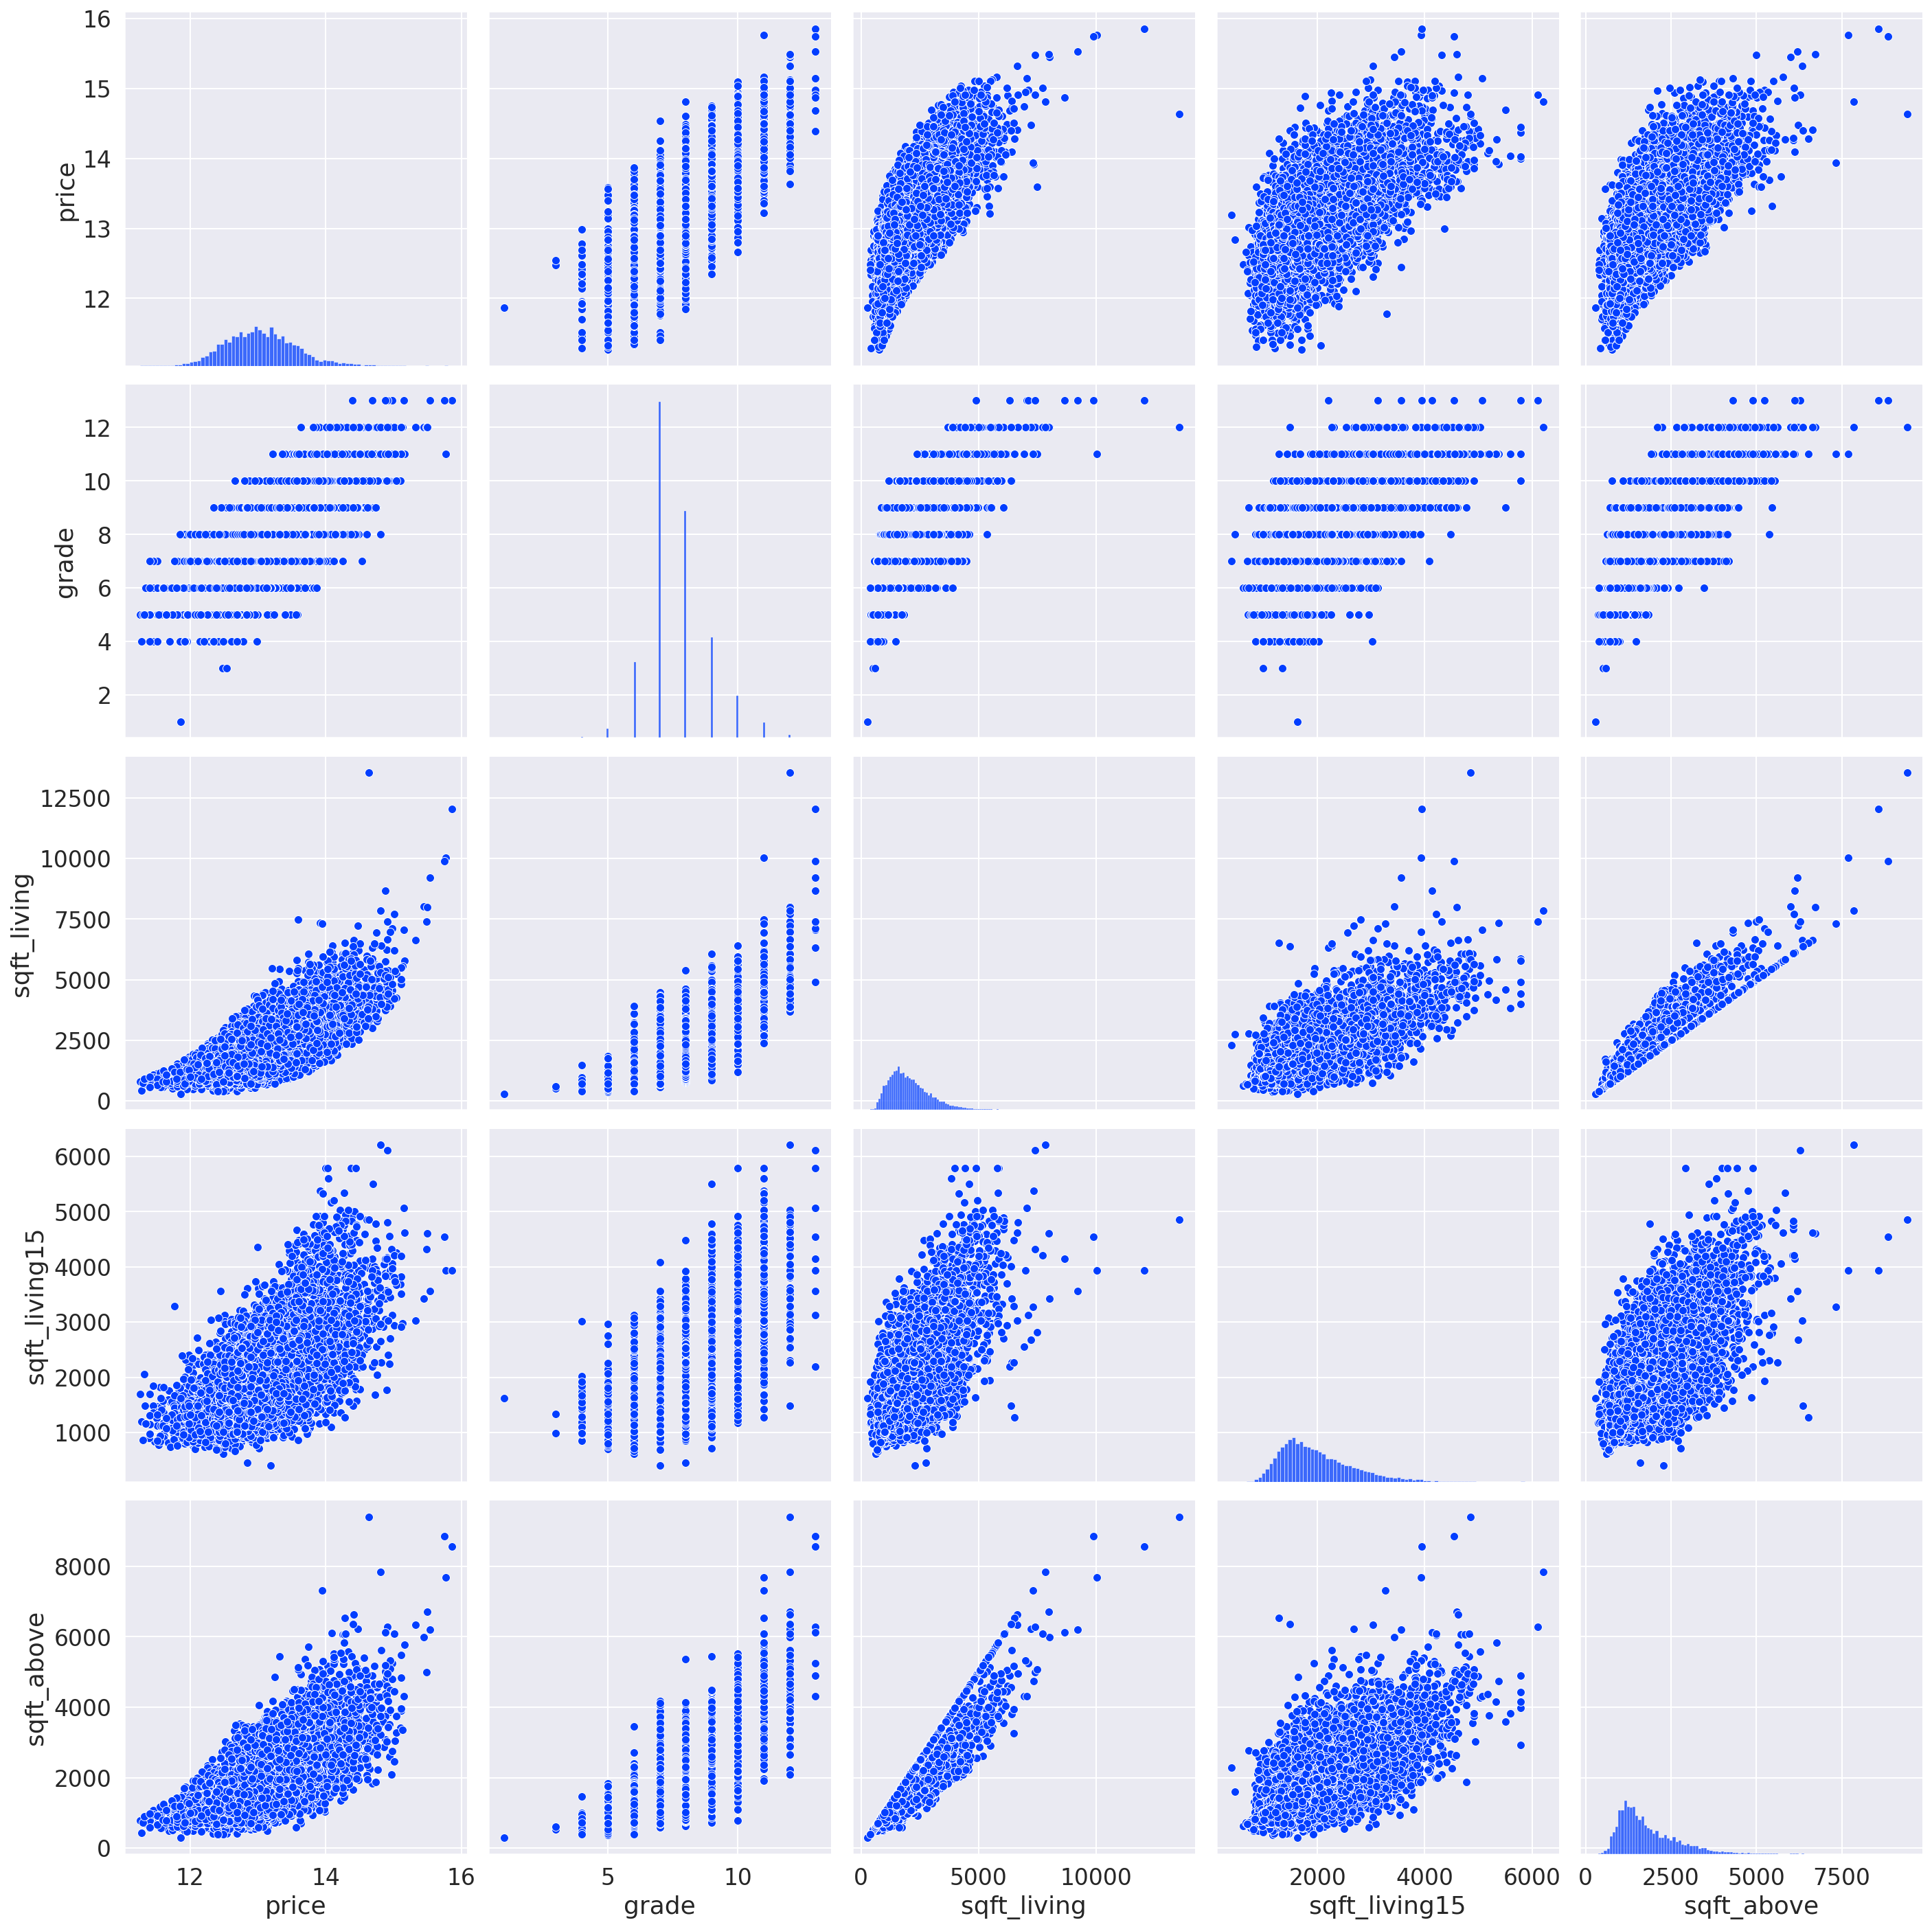

In [ ]:
plt.style.use('dark_background') 
sns.set(style="darkgrid",palette="bright", font_scale=1.5) 
sns.pairplot(df_train[['price','grade','sqft_living', 'sqft_living15', 'sqft_above']], height=4)

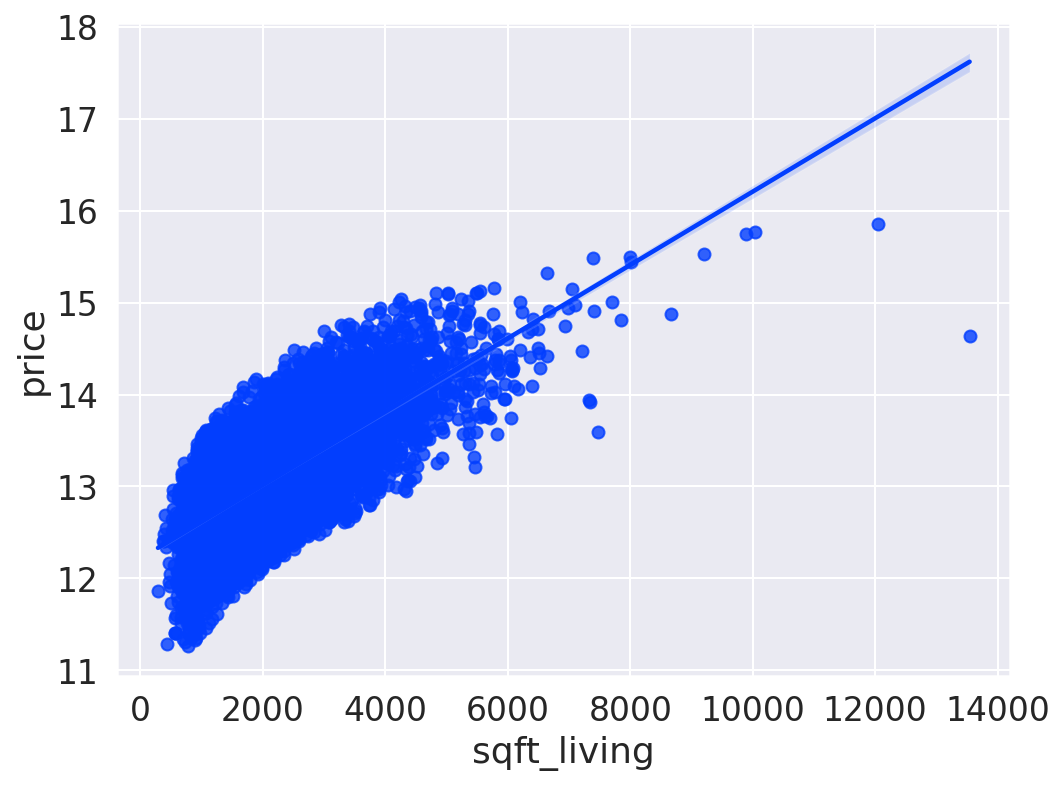

In [ ]:
data = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

In [ ]:
#outlier Ï†úÍ±∞
df_train.loc[df_train['sqft_living'] > 13000]

id             date      price  ...     long  sqft_living15  sqft_lot15
8912  8912  20140505T000000  14.639686  ... -121.986           4850      217800

[1 rows x 21 columns]

###  5.ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [ ]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21503


In [ ]:
data.head()

id             date  bedrooms  ...     long  sqft_living15  sqft_lot15
0   0  20141013T000000         3  ... -122.257           1340        5650
1   1  20150225T000000         2  ... -122.233           2720        8062
2   2  20150218T000000         3  ... -122.045           1800        7503
3   3  20140627T000000         3  ... -122.327           2238        6819
4   4  20150115T000000         3  ... -122.315           1650        9711

[5 rows x 20 columns]

### 6.Ï†ÑÏ≤òÎ¶¨

In [ ]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # priceÍ≥º correlationÏù¥ ÎÜíÏùÄ column 10Í∞ú ÎΩëÍ∏∞(ÎÇ¥Î¶ºÏ∞®Ïàú)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

### 7. id, date Î≥ÄÏàò Ï†ïÎ¶¨

In [ ]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))#Ïó∞/Ïõî Îç∞Ïù¥ÌÑ∞Îßå

data.head()

date  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  201410         3       1.00  ... -122.257           1340        5650
1  201502         2       1.00  ... -122.233           2720        8062
2  201502         3       2.00  ... -122.045           1800        7503
3  201406         3       2.25  ... -122.327           2238        6819
4  201501         3       1.50  ... -122.315           1650        9711

[5 rows x 19 columns]

### 8. Í∞Å Î≥ÄÏàòÎì§ Î∂ÑÌè¨ ÌôïÏù∏

bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥ÎäîÍµ∞Ïöî.




In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

Ïñçüí¢


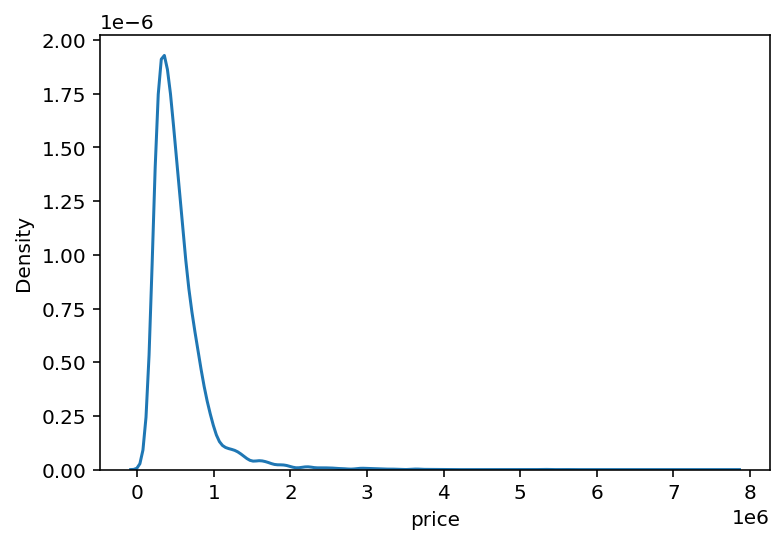

In [ ]:
sns.kdeplot(y)
plt.show()

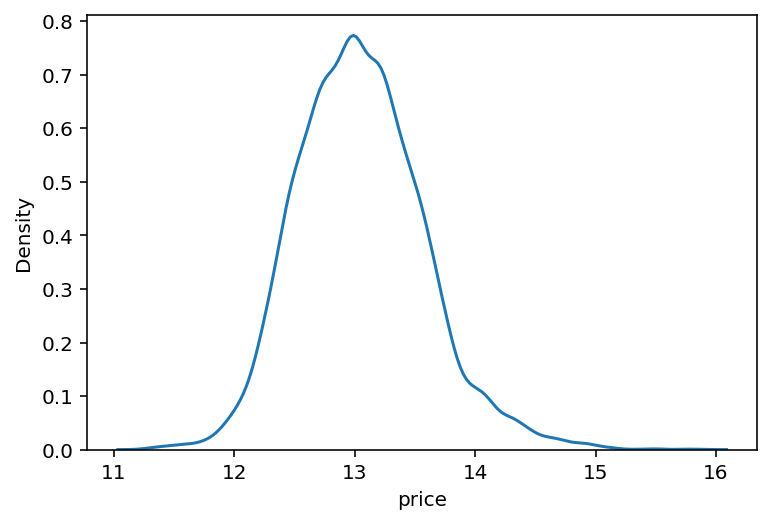

In [ ]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [ ]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


### Feature Engineering

In [ ]:
train

date  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0      201410         3       1.00  ... -122.257           1340        5650
1      201502         2       1.00  ... -122.233           2720        8062
2      201502         3       2.00  ... -122.045           1800        7503
3      201406         3       2.25  ... -122.327           2238        6819
4      201501         3       1.50  ... -122.315           1650        9711
...       ...       ...        ...  ...      ...            ...         ...
15030  201410         4       2.50  ... -122.167           2520        6023
15031  201503         4       3.50  ... -122.398           2050        6200
15032  201405         3       2.50  ... -122.346           1530        1509
15033  201502         4       2.50  ... -122.362           1830        7200
15034  201410         2       0.75  ... -122.299           1020        1357

[15035 rows x 19 columns]

In [ ]:
data.head()

date  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  201410  1.386294       1.00  ... -122.257       7.201171    8.639588
1  201502  1.098612       1.00  ... -122.233       7.908755    8.995041
2  201502  1.386294       2.00  ... -122.045       7.496097    8.923191
3  201406  1.386294       2.25  ... -122.327       7.713785    8.827615
4  201501  1.386294       1.50  ... -122.315       7.409136    9.181118

[5 rows x 19 columns]

###9. Average Blending

In [ ]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### 10.Cross Validation

In [ ]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

In [ ]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
[07:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBoost, CV score:0.8624
Model: LightGBM, CV score:0.8819


11 .Make Submission File

In [ ]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('Ïñçüí¢')

Ïñçüí¢


In [ ]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

[07:18:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
6468


array([ 562566.39221578,  389660.68147617, 1340643.45409443, ...,
        438058.69137012,  345498.01852609,  414241.23776683])

In [ ]:
data_dir = '/content/drive/MyDrive/Github/Kaggle/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [ ]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

id         price
0  15035  5.625664e+05
1  15036  3.896607e+05
2  15037  1.340643e+06
3  15038  3.317573e+05
4  15039  2.966855e+05

In [ ]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/content/drive/MyDrive/Github/Kaggle/kaggle_kakr_housing/data/submission.csv


# ÏÉàÎ°≠Í≤å ÎèÑÏ†Ñ!

In [ ]:
data_dir = '/content/drive/MyDrive/Github/Kaggle/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
train.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0   0  20141013T000000  221900.0  ... -122.257           1340        5650
1   1  20150225T000000  180000.0  ... -122.233           2720        8062
2   2  20150218T000000  510000.0  ... -122.045           1800        7503
3   3  20140627T000000  257500.0  ... -122.327           2238        6819
4   4  20150115T000000  291850.0  ... -122.315           1650        9711

[5 rows x 21 columns]

In [ ]:
#date ÏàòÏ†ï
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
#testÎèÑ
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

train.head()

id    date     price  bedrooms  ...      lat     long  sqft_living15  sqft_lot15
0   0  201410  221900.0         3  ...  47.5112 -122.257           1340        5650
1   1  201502  180000.0         2  ...  47.7379 -122.233           2720        8062
2   2  201502  510000.0         3  ...  47.6168 -122.045           1800        7503
3   3  201406  257500.0         3  ...  47.3097 -122.327           2238        6819
4   4  201501  291850.0         3  ...  47.4095 -122.315           1650        9711

[5 rows x 21 columns]

In [ ]:
#targetÎ∂ÑÎ¶¨
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
#id Ï†úÍ±∞
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

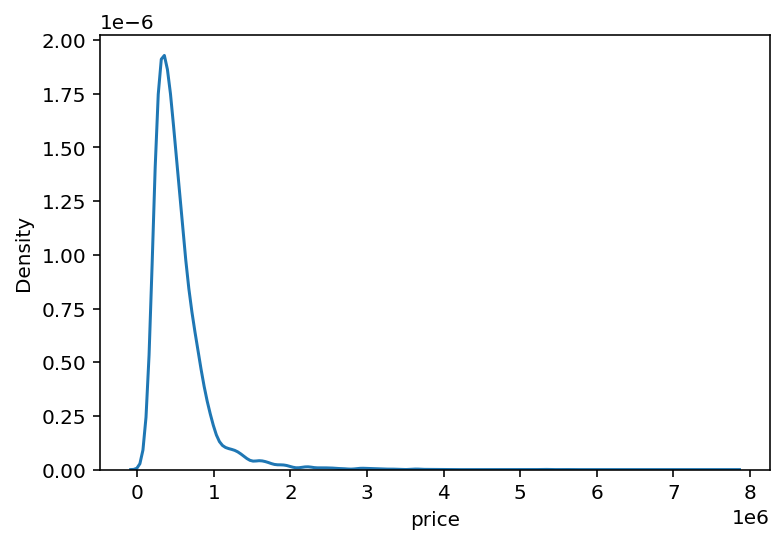

In [ ]:
sns.kdeplot(y)
plt.show()

In [ ]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

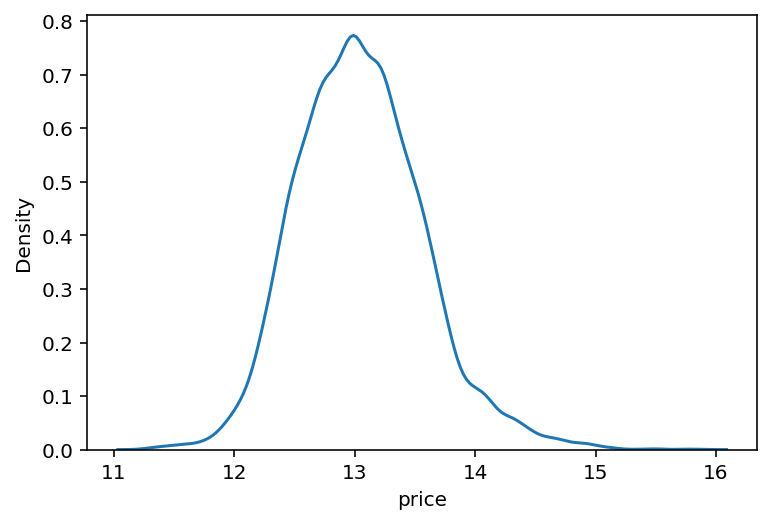

In [ ]:
sns.kdeplot(y)
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Ìïú Í∞ÄÏßÄ Ï£ºÏùòÌï¥Ïïº Ìï† Í≤ÉÏùÄ, y_testÎÇò y_predÎäî ÏúÑÏóêÏÑú np.log1p()Î°ú Î≥ÄÌôòÏù¥ Îêú Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïùò Îã®ÏúÑÏóê ÎßûÍ≤å ÎêòÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ np.expm1()ÏùÑ Ï∂îÍ∞ÄÌï¥Ïïº ÌïúÎã§Îäî Ï†êÏûÖÎãàÎã§.

In [ ]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


In [ ]:
gboost.__class__.__name__ #Î™®Îç∏Ïùò Ïù¥Î¶Ñ ÏñªÍ∏∞

'GradientBoostingRegressor'

In [ ]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

[07:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'GradientBoostingRegressor': 128360.19649691365,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125576.03932336495,
 'XGBRegressor': 131067.44622809246}

In [ ]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

In [ ]:
from sklearn.model_selection import GridSearchCV

Ïö∞ÏÑ† Í∑∏Î¶¨Îìú ÌÉêÏÉâÍ≥º ÎûúÎç§ ÌÉêÏÉâÏùÑ ÏïåÏïÑÎ≥º ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. Îëê Í∞ÄÏßÄ Î™®Îëê ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ìï©Ìï¥ Î≥¥Îäî Î∞©Î≤ïÏûÖÎãàÎã§.

Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÄ ÏÇ¨ÎûåÏù¥ Î®ºÏ†Ä ÌÉêÏÉâÌï† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞íÎì§ÏùÑ Ï†ïÌï¥ÎëêÍ≥†, Í∑∏ Í∞íÎì§Î°ú ÎßåÎì§Ïñ¥Ïßà Ïàò ÏûàÎäî Î™®Îì† Ï°∞Ìï©ÏùÑ ÌÉêÏÉâÌï©ÎãàÎã§. ÌäπÏ†ï Í∞íÏóê ÎåÄÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©ÏùÑ Î™®Îëê ÌÉêÏÉâÌïòÍ≥†Ïûê Ìï† Îïå Ïú†Î¶¨


ÎûúÎç§ ÌÉêÏÉâÏùÄ ÏÇ¨ÎûåÏù¥ ÌÉêÏÉâÌï† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïùò Í≥µÍ∞ÑÎßå Ï†ïÌï¥ÎëêÍ≥†, Í∑∏ ÏïàÏóêÏÑú ÎûúÎç§ÏúºÎ°ú Ï°∞Ìï©ÏùÑ ÏÑ†ÌÉùÌï¥ÏÑú ÌÉêÏÉâÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.

param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)

scoring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú

cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò

verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë (Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.)

n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}#Í∞ÄÎä•Ìïú Ï°∞Ìï©ÏùÄ Ï¥ù 2x2 = 4Í∞ÄÏßÄ 
#cross validationÏùÄ Í≤ΩÏö∞ÎßàÎã§ 5Î≤à ÏßÑÌñâ -> 4x5 = 20 fitsÏßÑÌñâ

In [ ]:
model = LGBMRegressor(random_state=random_state)

grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    7.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=2020,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_s

In [ ]:
grid_model.cv_results_ #grid_model.fit Ìï®ÏàòÎ•º ÌÜµÌï¥ÏÑú 4Í∞ÄÏßÄ Ï°∞Ìï©Ïóê ÎåÄÌïú Ïã§Ìóò Í≤∞Í≥º

{'mean_fit_time': array([0.34236956, 0.39309068, 1.00696011, 1.58746781]),
 'mean_score_time': array([0.0257781 , 0.03058152, 0.04600477, 0.0611073 ]),
 'mean_test_score': array([-0.07339447, -0.05502043, -0.02917734, -0.02702714]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904, -0.05546079, 

In [ ]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [ ]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [ ]:
results = pd.DataFrame(params)
results['score'] = score

results
#Ïôú Ïä§ÏΩîÏñ¥Í∞íÏù¥ ÏùåÏàò? 
#GridSearchCVÏóêÏÑú Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌï† Îïå scoring Ïù∏ÏûêÏóê MSEÏóê ÏùåÏàòÎ•º Ï∑®Ìïú Í∞íÏù∏ neg_mean_squared_errorÍ∞Ä Îì§Ïñ¥Í∞ê

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [ ]:
results['RMSE'] = np.sqrt(-1 * results['score'])#ÏùåÏàòÎ°ú Îêú MSEÏòÄÏúºÎãà, -1ÏùÑ Í≥±Ìï¥Ï£ºÍ≥† np.sqrtÎ°ú Î£®Ìä∏ Ïó∞ÏÇ∞
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [ ]:
results = results.rename(columns={'RMSE': 'RMSLE'})#ÏÇ¨Ïã§ÏÉÅ Root Mean Squared Log ErrorÏûÑ
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [ ]:
results = results.sort_values('RMSLE')
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [ ]:
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    3.6s finished


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [ ]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

ValueError: ignored

In [ ]:
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_submission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `submission_model_name_RMSLE_100000.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = '/content/drive/MyDrive/Github/Kaggle/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [ ]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')